# Example with dt5

Datasets can be found [here](http://fmwww.bc.edu/ec-p/data/wooldridge/datasets.list.html). The **MROZ** dataset contains cross-sectional labor force participation data:


`inlf` - =1 if in labor force, 1975

`hours`- hours worked, 1975

`kidslt6`- # kids < 6 years

`kidsge6`- # kids 6-18

`age`- woman's age in yrs

`educ`- years of schooling

`wage`- estimated wage from earns., hours

`repwage`- reported wage at interview in 1976

`hushrs`- hours worked by husband, 1975

`husage`- husband's age

`huseduc`- husband's years of schooling

`huswage`- husband's hourly wage, 1975

`faminc`- family income, 1975

`mtr` - fed. marginal tax rate facing woman

`motheduc`- mother's years of schooling

`fatheduc`- father's years of schooling

`unem`- unem. rate in county of resid.

`city`- =1 if live in SMSA

`exper`- actual labor mkt exper

`nwifeinc`- (faminc - wage*hours)/1000

`lwage`- log(wage)

`expersq` - exper^2

assume that we are interested in modelling the labor force participation, `inlf`, of married women.

In [1]:
dt5 <- foreign::read.dta("http://fmwww.bc.edu/ec-p/data/wooldridge/mroz.dta")
dt5 <- data.frame(dt5)
head(dt5)

inlf hours kidslt6 kidsge6 age educ wage   repwage hushrs husage ... faminc
1 1    1610  1       0       32  12   3.3540 2.65    2708   34     ... 16310 
2 1    1656  0       2       30  12   1.3889 2.65    2310   30     ... 21800 
3 1    1980  1       3       35  12   4.5455 4.04    3072   40     ... 21040 
4 1     456  0       3       34  12   1.0965 3.25    1920   53     ...  7300 
5 1    1568  1       2       31  14   4.5918 3.60    2000   32     ... 27300 
6 1    2032  0       0       54  12   4.7421 4.70    1040   57     ... 19495 
  mtr    motheduc fatheduc unem city exper nwifeinc  lwage     expersq
1 0.7215 12        7        5.0 0    14    10.910060 1.2101541  196   
2 0.6615  7        7       11.0 1     5    19.499981 0.3285121   25   
3 0.6915 12        7        5.0 0    15    12.039910 1.5141380  225   
4 0.7815  7        7        5.0 0     6     6.799996 0.0921233   36   
5 0.6215 12       14        9.5 1     7    20.100060 1.5242720   49   
6 0.6915 14        7        7.5 1    33     9.859054 1.5564801 1089

## TASK 1

### - Split the data into $80\%$ training and $20\%$ test subsets.


We will begin by splitting the dataset into training and testing subsets. These are extremely important for binary outcome modelling - we need to make sure our model can correctly classify new data.

In [2]:
table(dt5$inlf)


  0   1 
325 428 

We see that we have approximately the same amount of data for both non-participating and participating women. So, we can partition our data as we normally would into $80\%$ training and $20\%$ test sets.

In [3]:
print(nrow(dt5))

[1] 753


In [4]:
n <- floor(nrow(dt5) * 0.8)
print(n)

[1] 602


In [5]:
dt5_train <- dt5[1:n, ]
dt5_test  <- dt5[-c(1:n), ]

In [6]:
print(nrow(dt5_train))
print(nrow(dt5_test))

[1] 602
[1] 151


The `dt4_train` is our training set, for which we will estimate our model and `dt4_test` is our test data subset, for which we will evaluate the adequacy of our model.

Note that a better way to do this would be to randomize the rows at first, if we are unsure of their randomnes:

In [7]:
any(duplicated(sample(1:nrow(dt5))))

[1] FALSE

In [8]:
#dt5 <- dt5[sample(1:nrow(dt5)), ]
#dt5_train <- dt5[1:n, ]
#dt5_test  <- dt5[-c(1:n), ]

Though we will leave this for another time. For now, we will naively assume that the data is already randomly organized.

## TASK 2

### - Postulate, what kind of model would be appropriate for this kind of data?

Modelling binary data involves creating a model for the probability of success (in this case it is `inlf = 1` - that a woman is participating in the labor force). 

We have three primary choices for binary data modelling:

- A multiple linear regression;
- A logit regression;
- A probit regression;

The multiple regression model does not take into account the fact that the probability $p \in \left[0, 1\right]$. Therefore, we will opt to use the logistic and probit regressions.

### **Note: it is also possible to estimate a multiple linear regression and compare the results with logit and probit models - try it**.

## TASK 3

### - Examine, how the independent variables relate to the dependent variable and to one-another. Do you notice any relationships?
### - What variables would you include in your model? What signs do you expect them to have? (Note: do not include any polynomial or interaction terms just yet)

In [9]:
options(repr.plot.width = 10)
options(repr.plot.height = 8)

In [10]:
print(colnames(dt5_train))

 [1] "inlf"     "hours"    "kidslt6"  "kidsge6"  "age"      "educ"    
 [7] "wage"     "repwage"  "hushrs"   "husage"   "huseduc"  "huswage" 
[13] "faminc"   "mtr"      "motheduc" "fatheduc" "unem"     "city"    
[19] "exper"    "nwifeinc" "lwage"    "expersq" 


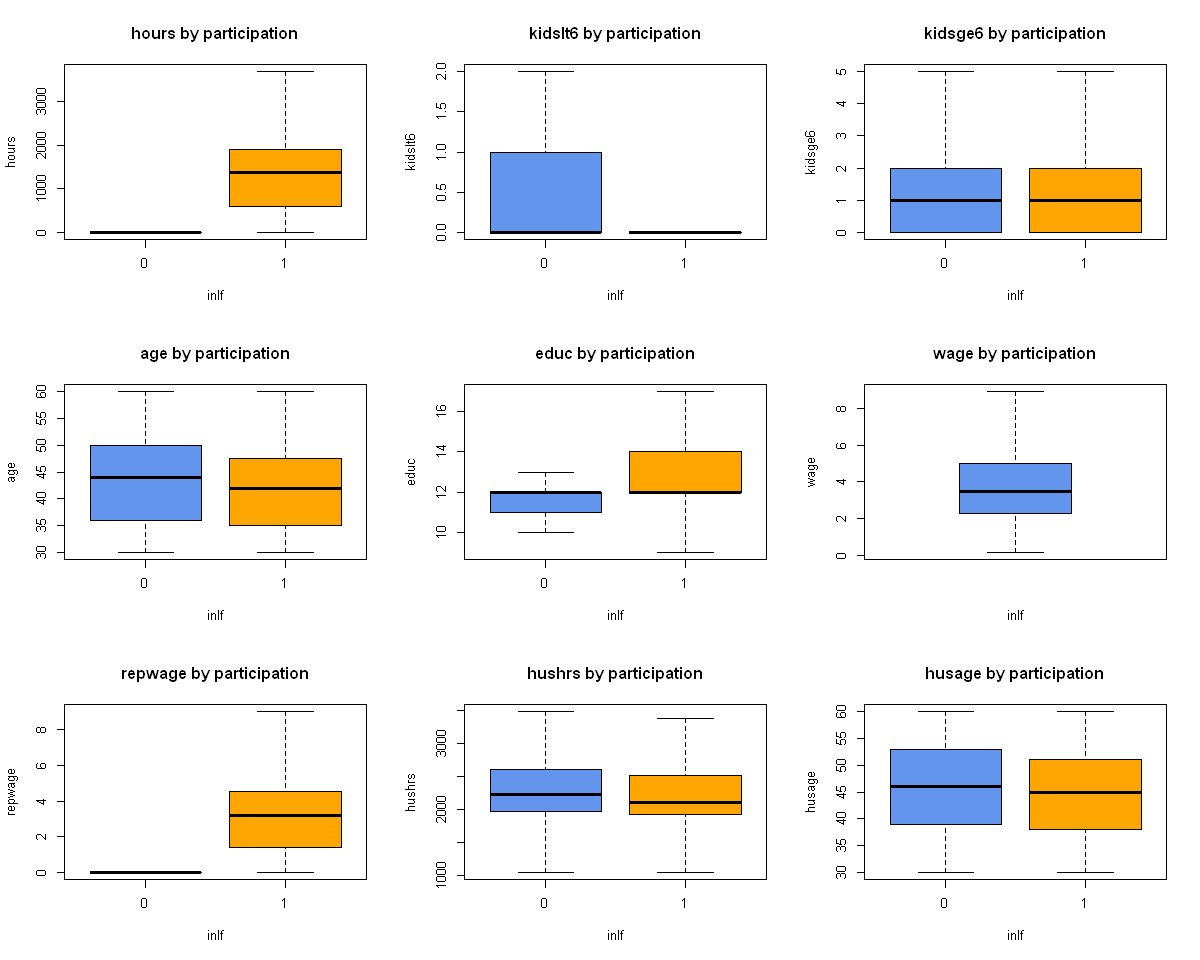

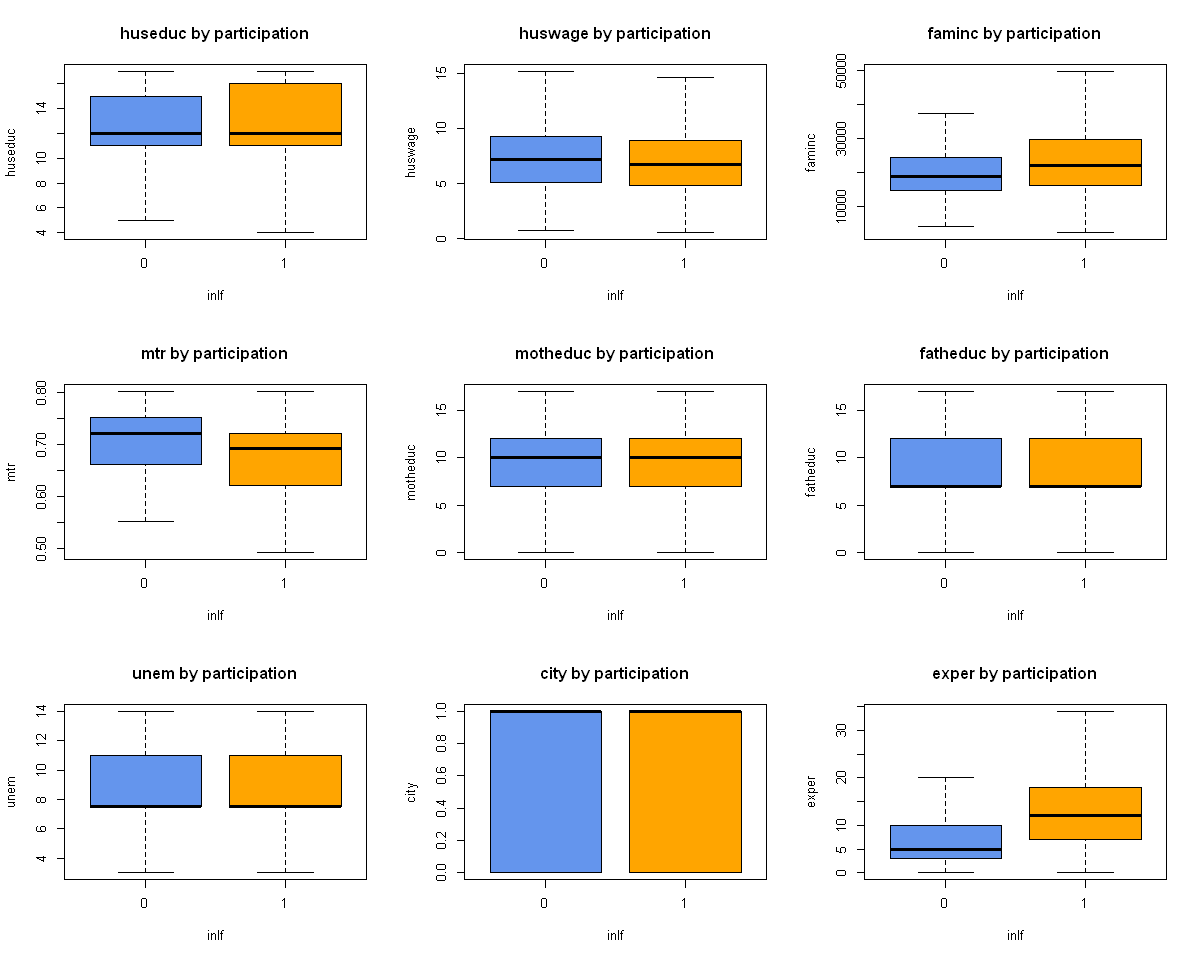

In [11]:
par(mfrow = c(3, 3))
for(i in 2:19){
    tmp_formula <- formula(paste0(colnames(dt5_train)[i]," ~ inlf"))
    boxplot(tmp_formula, dt5_train, 
            col = c("cornflowerblue", "orange"), 
            xlab = "inlf", ylab = colnames(dt5_train)[i], outline = FALSE, 
            main = paste0(colnames(dt5_train)[i], " by participation"))
}

---

Note that `city` is an indicator variable, for which the values `0` and `1` do not have any numerical interpretation, but rather only indicate whether the person lives in a city or not.

In order to meaningfully examine the differences between return to labor force in a city versus in a non-city, we can use a **contingency table**:

In [12]:
tbl <- xtabs(~ city + inlf, data = dt5)
print(tbl)

    inlf
city   0   1
   0 115 154
   1 210 274


To make it easier to understand where the data falls in this barchart, we will change the categorization of the variables:

In [13]:
dt5_tmp <- dt5
dt5_tmp$inlf[dt5_tmp$inlf == 0] <- "Not in labor force"
dt5_tmp$inlf[dt5_tmp$inlf == 1] <- "In labor force"
dt5_tmp$city[dt5_tmp$city == 1] <- "Yes"
dt5_tmp$city[dt5_tmp$city == 0] <- "No"

In [14]:
tbl <- xtabs(~ city + inlf, data = dt5_tmp)
print(tbl)

     inlf
city  In labor force Not in labor force
  No             154                115
  Yes            274                210


We can further visualize this with a `barplot`. The following transposed contingencyt table will be used for the barplot:

In [15]:
t(tbl)

                    city
inlf                  No Yes
  In labor force     154 274
  Not in labor force 115 210

Each `column` will be on the horizontal axis. In this case - the axis will have `No` and `Yes` labels.

Each `row` will be a differently colored barchart - the barcharts will either be grouped according to the `columns`, or they will be `stacked` on top of each other according to the columns.

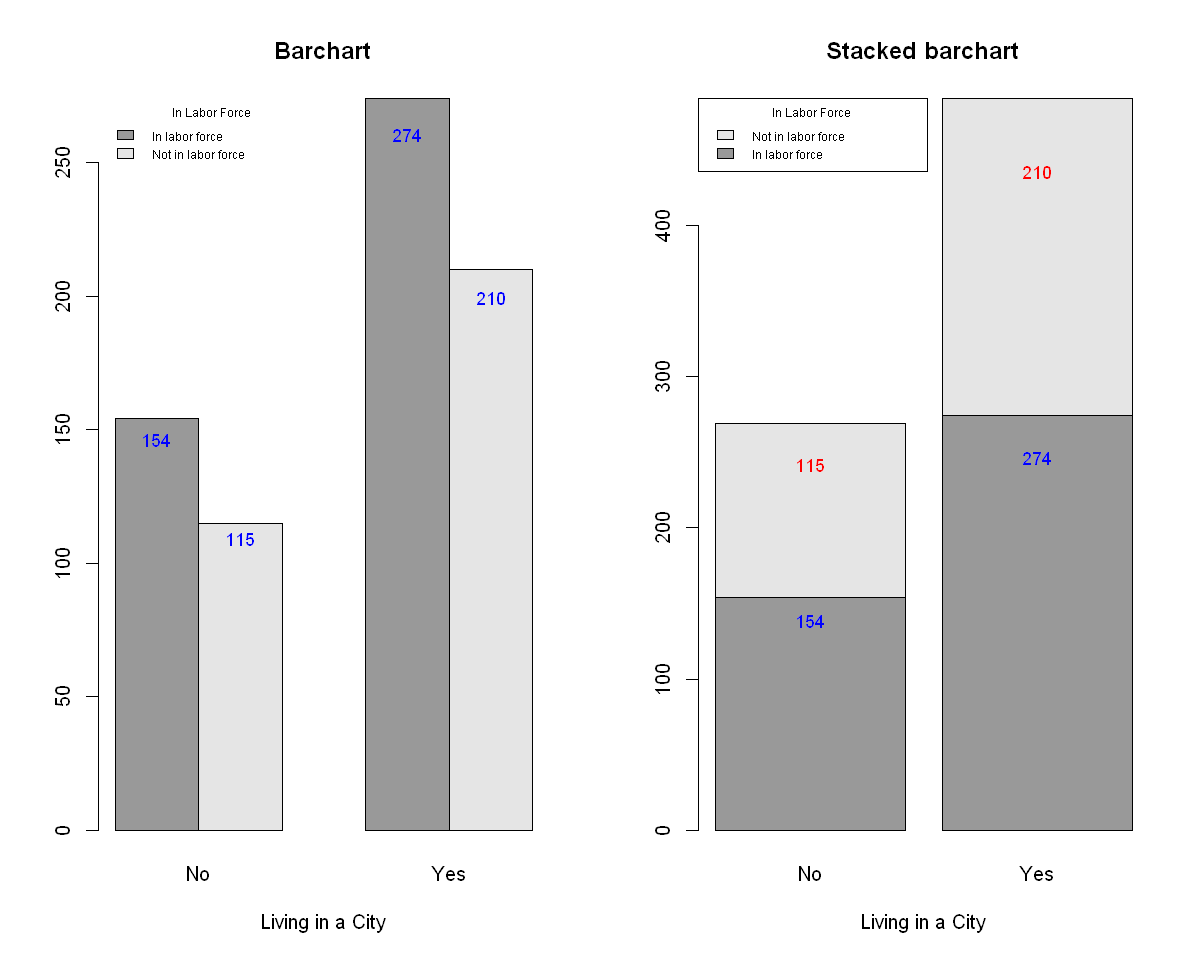

In [16]:
par(mfrow = c(1, 2))
bb <- barplot(t(tbl), beside = TRUE, col = c("grey60", "grey90"), main = "Barchart", xlab = "Living in a City",
              legend.text = TRUE, args.legend = list(x = "topleft", bty = "n", title = "In Labor Force", cex = 0.6))
# Add the numeric values to the bar chart
text(bb, c(t(tbl))*0.95, labels = c(t(tbl)), cex = 0.9, col = "blue")
#
bb <- barplot(t(tbl), beside = FALSE, col = c("grey60", "grey90"), main = "Stacked barchart", xlab = "Living in a City", 
        legend.text = TRUE, args.legend = list(x = "topleft", bty = "y", title = "In Labor Force", cex = 0.6))
text(bb, t(tbl)[1,]*0.9, labels = t(tbl)[1,], cex = 0.9, col = "blue")
text(bb, colSums(t(tbl))*0.9, labels = t(tbl)[2,], cex = 0.9, col = "red")
#legend("topleft", legend = c("inlf = 0", "inlf = 1"), fill = c("black", "gray"), bty = "y")

**Note: compare the values in `t(tbl)` and the barcharts - make sure you understand, which variables are in the horizontal axis, and which variable is used for different bar colors.**

Overall, we see that there are more women from cities in this sample, however, the tendency is the same - whether a woman is from a city or not - there are more women returning to the labor force instead of staying at home.

It may be more interesting to examine the proportion of city and non-city women returning to the workforce:

In [17]:
round(prop.table(tbl, 1), 5)

     inlf
city  In labor force Not in labor force
  No         0.57249            0.42751
  Yes        0.56612            0.43388

Note that each row sums up to `1` (i.e. `100%` of city and `100%` of non-city women are split into returning to the labor force and staying at home):

- the first row indicates the proportion of women in labor force and not in labor force of the total women not living in a city.
- the second row indicated the proportions of women in labor force and not in labor force of the total women living in a city.

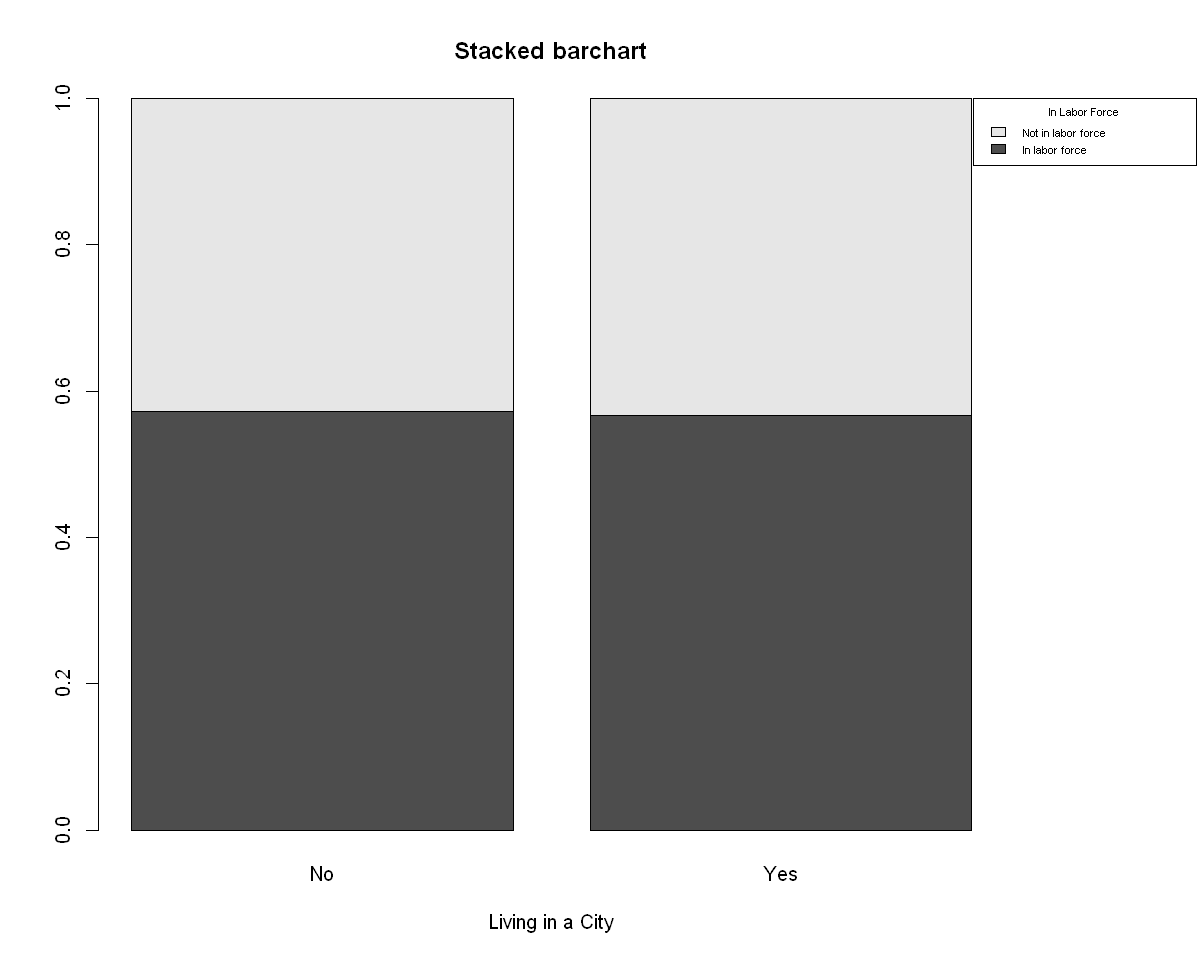

In [18]:
par(mar=c(5.1, 4.1, 4.1, 8.1), xpd = TRUE)
barplot(t(prop.table(tbl, 1)), beside = FALSE, main = "Stacked barchart", xlab = "Living in a City", 
        legend.text = TRUE, args.legend = list(x = "topright", bty = "y", inset=c(-0.21, 0), title = "In Labor Force", cex = 0.55))
#legend("topright", inset=c(-0.21, 0) , legend = c("inlf = 0", "inlf = 1"), fill = c("black", "gray"))

So, while there are fewer women from non-cities in this data sample, the proportion of women, who decide to return to the workforce is very similar, regardless if the woman lives in  a city or not.

Finally, note that when calculating the proportions:

In [19]:
round(prop.table(tbl, 1), 5)

     inlf
city  In labor force Not in labor force
  No         0.57249            0.42751
  Yes        0.56612            0.43388

there is a difference between:

In [20]:
round(t(prop.table(tbl, 1)), 5)

                    city
inlf                      No     Yes
  In labor force     0.57249 0.56612
  Not in labor force 0.42751 0.43388

and:

In [21]:
round(prop.table(t(tbl), 1), 5)

                    city
inlf                      No     Yes
  In labor force     0.35981 0.64019
  Not in labor force 0.35385 0.64615

In the first case - we have calculated the proportions of women in labor force, and not in labor force separetely for all women living in cities and for all women living outside cities. Then we simply transposed that table.

In the second case we have calculated the proportions of women living in a city, and outside the city separately for all in-labor-force-women (so that they sum up to `100%` of in labor force women) and all not-in-labot-force women (so that they sum up to `100%` of not in labor force women);


Note that we are not restricted to only indicator variables - we can very succesfully examine categorical variables, containing multiple different categories.

---

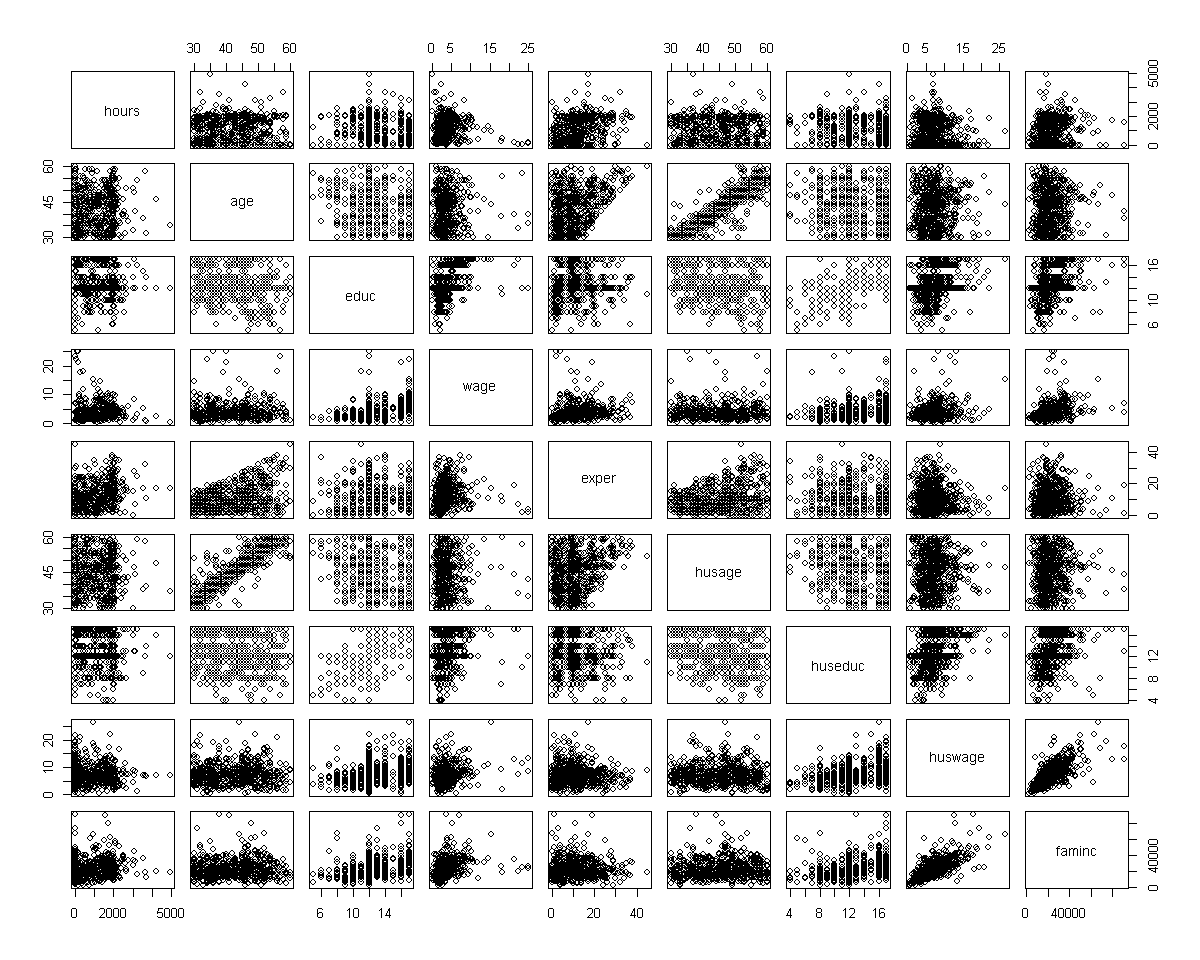

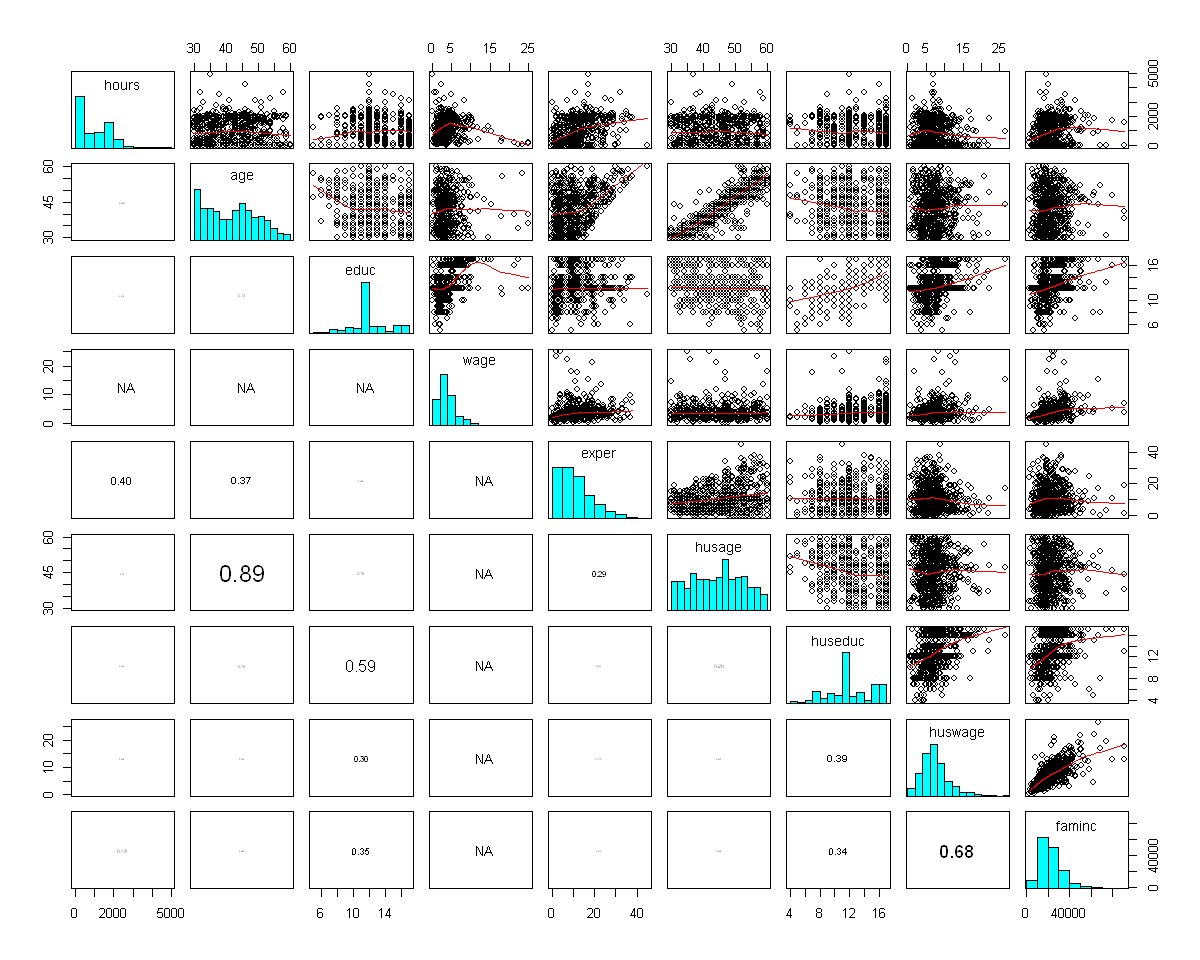

In [22]:
#From: https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html
panel.hist <- function(x, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h <- hist(x, plot = FALSE)
    breaks <- h$breaks; nB <- length(breaks)
    y <- h$counts; y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- abs(cor(x, y))
    txt <- format(c(r, 0.123456789), digits = digits)[1]
    txt <- paste0(prefix, txt)
    if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}

pairs(dt5_train[, c("hours", "age", "educ", "wage", "exper", "husage", "huseduc", "huswage", "faminc")])
pairs(dt5_train[, c("hours", "age", "educ", "wage", "exper", "husage", "huseduc", "huswage", "faminc")], diag.panel = panel.hist, lower.panel = panel.cor, upper.panel = panel.smooth)

In [23]:
#for(i in 2:19){
    #print(colnames(dt5_train)[i])
    #print(tapply(dt5_train[, colnames(dt5_train)[i]], dt5_train$inlf, summary))
    #print("---------------------------------------------------------------------")
#}

We see that for some variables - like `age`, `educ`, `exper`, there is a difference between the two groups.

We would expect the following relationship between the independent variables and the participation rate:

- $\beta_{educ} > 0$ - a higher education is more likely to lead to an active labor force participation, since the person has already **invested their time** into improving themselves and have a better chance of earning a higher wage, hence they are more likely to be motivated to return to the workforce;
- $\beta_{exper} > 0$ - the more experience they have, the more likely that they will return to a higher pay job, hence they are more motivated to return to the workforce;
- $\beta_{age} < 0$ - the older they are, the less likely they are to be highered back in a good paying position. Hence they may be discouraged from returning to the workforce;

in addition:

- $\beta_{kidslt6} < 0$ - the more younger kinds in the family, the higher chance that one of the parents will remain at home to look after them;
- $\beta_{kidsge6} > 0$ - older children are at school or daycare, so the parent is less likely to stay at home, when they could be working (especially since buying school supplies, clothes, etc. would benefit from additional income);


## TASK 4

### - Estimate one or more model(-s) based on your answers in Task 2 and Task 3. Are there any insignificant variables?

We will estimate both a logit and probit models.

In [24]:
logit_glm  <- glm(inlf ~ educ + exper + age + kidslt6 + kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)  1.44243 1.00899     1.42958 0.15284 
educ         0.18468 0.04800     3.84757 0.00012 
exper        0.12986 0.01691     7.67801 0.00000 
age         -0.09074 0.01700    -5.33889 0.00000 
kidslt6     -1.42174 0.22830    -6.22740 0.00000 
kidsge6      0.07344 0.08762     0.83818 0.40193

In [25]:
probit_glm <- glm(inlf ~ educ + exper + age + kidslt6 + kidsge6, data = dt5_train, family = binomial(link = "probit"))
round(coef(summary(probit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)  0.93704 0.58188     1.61038 0.10731 
educ         0.11016 0.02755     3.99892 0.00006 
exper        0.07380 0.00925     7.98287 0.00000 
age         -0.05496 0.00969    -5.67441 0.00000 
kidslt6     -0.86249 0.13284    -6.49269 0.00000 
kidsge6      0.03735 0.05087     0.73418 0.46284

The signs are as we would expect, but `kidsge6` appears to be insignificant.

## TASK 5 
### - Are there any collinear variables? If so, remove the multicollinearity.

In [26]:
print(cbind(car::vif(logit_glm)))

            [,1]
educ    1.074126
exper   1.156804
age     1.703891
kidslt6 1.450408
kidsge6 1.242962


We do not have any collinear variables.

## TASK 6

### - Include polynomial and/or interaction terms in your model. Explain your motivation for selecting these variables and their signs.

We may want to include the following variables:

- $educ^2$ - each additional year of education would have a decreasing effect on the participation rate, so that $\beta_{educ^2} < 0$;
- $exper^2$ - each additional year of experience would have a decreasing effect on the participation rate, so that $\beta_{exper^2} < 0$;
- $age^2$ - each additional year of experience would have an increasing negative effect on the participation rate, so that $\beta_{age^2} < 0$;
- $kidslt6^2$ - each additional young kid would significantly reduce the participation rate further, so that $\beta_{kidslt6^2} < 0$
- $kidsge6^2$ - each additional older kid would further increase the participation rate, since more money is needed for clothes, books, trips, after school activities, etc. On the other hand, younger children may get hand-me-downs from their older siblings.

Regarding interaction terms, lets assume that we want to include:

- $kidslt6 \times kidsge6$ - if we already have a number of older kids, and then we have a younger child, then it may be more likely that the older sibling will babysit the younger ones. Meanwhile the parents can go to work.

In [27]:
logit_glm  <- glm(inlf ~ educ + I(educ^2) + exper + I(exper^2) + age + I(age^2) + kidslt6 + I(kidslt6^2) + kidsge6 + I(kidsge6^2), data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)   2.37291 3.89189     0.60971 0.54206 
educ         -0.21699 0.31343    -0.69231 0.48874 
I(educ^2)     0.01618 0.01287     1.25699 0.20876 
exper         0.20877 0.03959     5.27303 0.00000 
I(exper^2)   -0.00293 0.00128    -2.29261 0.02187 
age          -0.04097 0.16160    -0.25351 0.79987 
I(age^2)     -0.00054 0.00187    -0.28590 0.77495 
kidslt6      -0.87533 0.62116    -1.40920 0.15878 
I(kidslt6^2) -0.34784 0.36620    -0.94985 0.34219 
kidsge6       0.10136 0.22997     0.44074 0.65940 
I(kidsge6^2) -0.00725 0.05133    -0.14126 0.88767

We see lots of insignificant variables. Instead, let's try adding one by one

In [28]:
logit_glm  <- glm(inlf ~ educ + I(educ^2) + exper + age + kidslt6 + kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)  3.57652 2.06186     1.73461 0.08281 
educ        -0.17722 0.30834    -0.57476 0.56546 
I(educ^2)    0.01497 0.01265     1.18385 0.23647 
exper        0.12976 0.01686     7.69479 0.00000 
age         -0.09132 0.01699    -5.37619 0.00000 
kidslt6     -1.44724 0.23135    -6.25566 0.00000 
kidsge6      0.08243 0.08795     0.93722 0.34864

`educ^2` is insignificant.

In [29]:
logit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + kidslt6 + kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)  1.17661 1.02507     1.14783 0.25104 
educ         0.17237 0.04844     3.55860 0.00037 
exper        0.20720 0.03857     5.37226 0.00000 
I(exper^2)  -0.00293 0.00124    -2.36180 0.01819 
age         -0.08862 0.01729    -5.12716 0.00000 
kidslt6     -1.41915 0.22987    -6.17366 0.00000 
kidsge6      0.07470 0.08919     0.83753 0.40229

`exper^2` is significant.

In [30]:
logit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + I(age^2) + kidslt6 + kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)  0.17264 3.41281     0.05059 0.95966 
educ         0.17238 0.04845     3.55777 0.00037 
exper        0.20469 0.03938     5.19813 0.00000 
I(exper^2)  -0.00282 0.00128    -2.20682 0.02733 
age         -0.03964 0.15984    -0.24796 0.80417 
I(age^2)    -0.00057 0.00185    -0.30811 0.75800 
kidslt6     -1.40186 0.23587    -5.94330 0.00000 
kidsge6      0.06778 0.09184     0.73798 0.46053

`age^2` is insignificant. 

If we include an interaction term:

In [31]:
logit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + kidslt6*kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      1.70098 1.04919     1.62123 0.10497 
educ             0.19791 0.05020     3.94197 0.00008 
exper            0.21693 0.03877     5.59589 0.00000 
I(exper^2)      -0.00318 0.00123    -2.57767 0.00995 
age             -0.10395 0.01832    -5.67236 0.00000 
kidslt6         -2.28803 0.37195    -6.15140 0.00000 
kidsge6         -0.08289 0.09919    -0.83566 0.40334 
kidslt6:kidsge6  0.53630 0.16900     3.17341 0.00151

It is significant. But their squared terms are not:

In [32]:
logit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + kidslt6*kidsge6 + I(kidslt6^2)  + I(kidsge6^2), data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      1.73274 1.09457     1.58304 0.11341 
educ             0.19860 0.05039     3.94126 0.00008 
exper            0.21690 0.03890     5.57533 0.00000 
I(exper^2)      -0.00319 0.00124    -2.57792 0.00994 
age             -0.10446 0.01904    -5.48616 0.00000 
kidslt6         -2.26474 0.74439    -3.04240 0.00235 
kidsge6         -0.11724 0.22999    -0.50978 0.61021 
I(kidslt6^2)    -0.01828 0.37168    -0.04918 0.96078 
I(kidsge6^2)     0.00829 0.04956     0.16729 0.86714 
kidslt6:kidsge6  0.53807 0.17471     3.07977 0.00207

Hence, our finalized model is:

In [33]:
logit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + kidslt6*kidsge6, data = dt5_train, family = binomial(link = "logit"))
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      1.70098 1.04919     1.62123 0.10497 
educ             0.19791 0.05020     3.94197 0.00008 
exper            0.21693 0.03877     5.59589 0.00000 
I(exper^2)      -0.00318 0.00123    -2.57767 0.00995 
age             -0.10395 0.01832    -5.67236 0.00000 
kidslt6         -2.28803 0.37195    -6.15140 0.00000 
kidsge6         -0.08289 0.09919    -0.83566 0.40334 
kidslt6:kidsge6  0.53630 0.16900     3.17341 0.00151

Again note that `kidslt6:kidsge6` is significant, so we cannot remove the main effect `kidsge6`, even though it is significant (unless we want to make interpretation harder for ourselves,which we don't).

The same model is estimated for the probit regression:

In [34]:
probit_glm  <- glm(inlf ~ educ  + exper + I(exper^2) + age + kidslt6*kidsge6, data = dt5_train, family = binomial(link = "probit"))
round(coef(summary(probit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      0.95926 0.60504     1.58545 0.11286 
educ             0.11640 0.02866     4.06061 0.00005 
exper            0.12800 0.02226     5.75096 0.00000 
I(exper^2)      -0.00188 0.00071    -2.65361 0.00796 
age             -0.06025 0.01036    -5.81485 0.00000 
kidslt6         -1.34130 0.21021    -6.38088 0.00000 
kidsge6         -0.04653 0.05730    -0.81207 0.41675 
kidslt6:kidsge6  0.31497 0.09829     3.20436 0.00135

the coefficients are also significant.

## TASK 7

### - Calculate the predicted probability values For various combinations of values:
#### - For continuous data $X_{j,i}$ create new value $\tilde{X}_{i, j} > \tilde{X}_{i, j+1}$, $j = 1,...,M$, where $\tilde{X}_{i, 1} = \min (X_{i})$ and $\tilde{X}_{i, M} = \max (X_{i})$. Select an arbitrary value $M$ so that the predicted probability plot chart is readable.
#### - For discrete data - select some cases to compare the probabilities. For example two curves: when $X_{j_1} = 1$ vs when $X_{j_1} = 0$.

#### - Plot the $95\%$ confidence bounds for the predictions for two cases.

We will do so in a single plot - we will use the range of `age`s in the training dataset as continuous data and the number of kids as discrete data, where the nulber of kids is a finite number from the training dataset.

In [35]:
max(dt5_train$age) - min(dt5_train$age)

[1] 30

We will firstly repeat the first line of the data 31 times:

In [36]:
predict_data_0 <- NULL
for(i in 1:31){
    predict_data_0 <- rbind(predict_data_0, dt5[1, , drop = FALSE])
}
head(predict_data_0)

inlf hours kidslt6 kidsge6 age educ wage  repwage hushrs husage ... faminc
1  1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
11 1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
12 1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
13 1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
14 1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
15 1    1610  1       0       32  12   3.354 2.65    2708   34     ... 16310 
   mtr    motheduc fatheduc unem city exper nwifeinc lwage    expersq
1  0.7215 12       7        5    0    14    10.91006 1.210154 196    
11 0.7215 12       7        5    0    14    10.91006 1.210154 196    
12 0.7215 12       7        5    0    14    10.91006 1.210154 196    
13 0.7215 12       7        5    0    14    10.91006 1.210154 196    
14 0.7215 12       7        5    0    14    10.91006 1.210154 196    
15 0.7215 12       7        5    0    14    10.91006 1.210154 196

Next, we will replace `age` with values to be within the ranges of the actual data

In [37]:
predict_data_1 <- predict_data_0
predict_data_1$age <- min(dt5_train$age):max(dt5_train$age)

and separate two cases: `kidslt6 = 0` and `kidslt6 = 1`

In [38]:
predict_data_2 <- predict_data_1

predict_data_1$kidslt6 <- 0
predict_data_2$kidslt6 <- 1

Then, the predicted values are (here we also calculate their standard errors, which we will use to calculate the confidence bounds):

In [39]:
predict_1 <- predict(logit_glm, newdata = predict_data_1, type = "response", se.fit = TRUE)
predict_2 <- predict(logit_glm, newdata = predict_data_2, type = "response", se.fit = TRUE)

In [40]:
print(predict_1)

$fit
        1        11        12        13        14        15        16        17 
0.9667743 0.9632685 0.9594082 0.9551612 0.9504927 0.9453659 0.9397419 0.9335797 
       18        19       110       111       112       113       114       115 
0.9268363 0.9194674 0.9114272 0.9026693 0.8931469 0.8828138 0.8716252 0.8595382 
      116       117       118       119       120       121       122       123 
0.8465136 0.8325166 0.8175183 0.8014971 0.7844402 0.7663450 0.7472202 0.7270875 
      124       125       126       127       128       129       130 
0.7059823 0.6839544 0.6610684 0.6374038 0.6130541 0.5881257 0.5627369 

$se.fit
         1         11         12         13         14         15         16 
0.01286851 0.01361606 0.01438090 0.01516033 0.01595159 0.01675199 0.01755923 
        17         18         19        110        111        112        113 
0.01837176 0.01918925 0.02001320 0.02084766 0.02170008 0.02258218 0.02351082 
       114        115        116        117   

In [41]:
predict_1_bounds <- data.frame(lwr = predict_1$fit - 1.96 * predict_1$se.fit, upr = predict_1$fit + 1.96 * predict_1$se.fit)
predict_2_bounds <- data.frame(lwr = predict_2$fit - 1.96 * predict_2$se.fit, upr = predict_2$fit + 1.96 * predict_2$se.fit)

Note that:

- `predict(logit_glm, newdata = predict_data_1)` predicts $\mathbf{X} \widehat{\beta}$
- `predict(logit_glm, newdata = predict_data_1, type = "response")` predicts $\widehat{\mu} = g^{-1}(\mathbf{X} \widehat{\beta})$

In [42]:
options(repr.plot.width = 10)
options(repr.plot.height = 6)

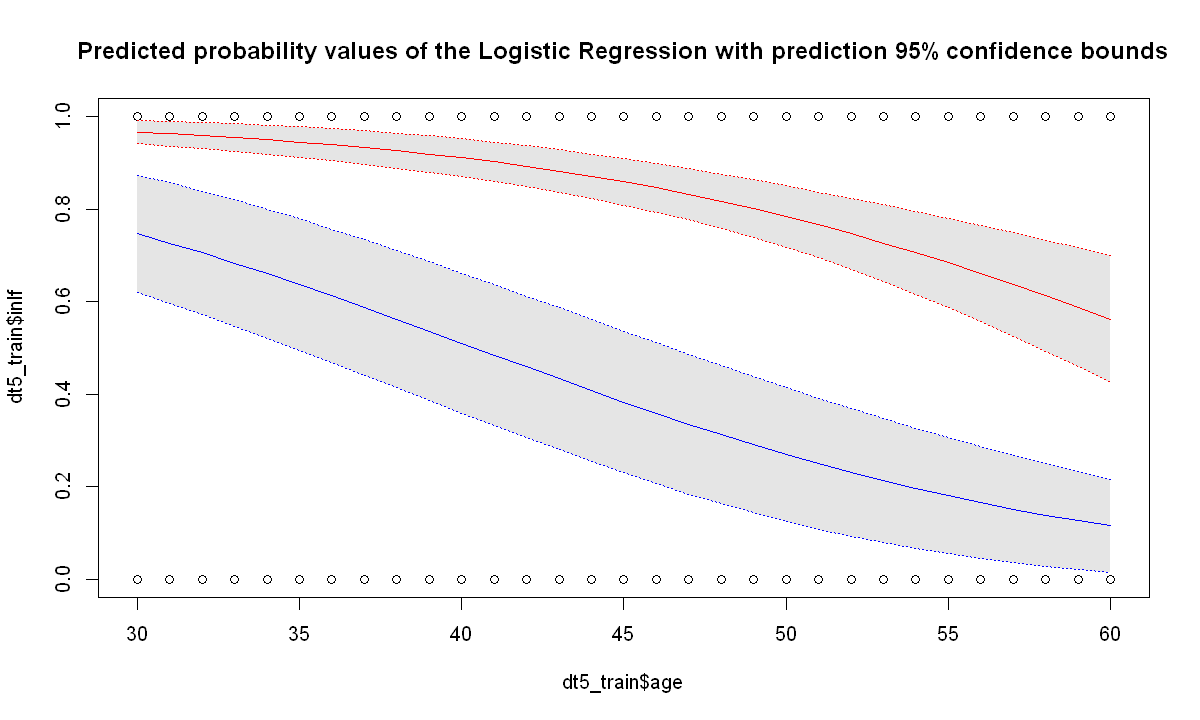

In [43]:
plot(dt5_train$age, dt5_train$inlf)
# Plot the confidence region:
polygon(c(predict_data_1$age, rev(predict_data_1$age)),  c(predict_1_bounds$upr, rev(predict_1_bounds$lwr)), col = "grey90", border = NA)
polygon(c(predict_data_2$age, rev(predict_data_2$age)),  c(predict_2_bounds$upr, rev(predict_2_bounds$lwr)), col = "grey90", border = NA)
# Plot the fitted probability values:
lines(predict_data_1$age, predict_1$fit, col = "red")
lines(predict_data_2$age, predict_2$fit, col = "blue")
# Plot the confidence bounds:
lines(predict_data_1$age, predict_1$fit - 1.96 * predict_1$se.fit, col = "red", lty = 3)
lines(predict_data_1$age, predict_1$fit + 1.96 * predict_1$se.fit, col = "red", lty = 3)
#
lines(predict_data_2$age, predict_2$fit - 1.96 * predict_2$se.fit, col = "blue", lty = 3)
lines(predict_data_2$age, predict_2$fit + 1.96 * predict_2$se.fit, col = "blue", lty = 3)

title("Predicted probability values of the Logistic Regression with prediction 95% confidence bounds")

We can even iterate this for various values of number kids under 6 years old:

In [44]:
options(repr.plot.width = 10)
options(repr.plot.height = 8)

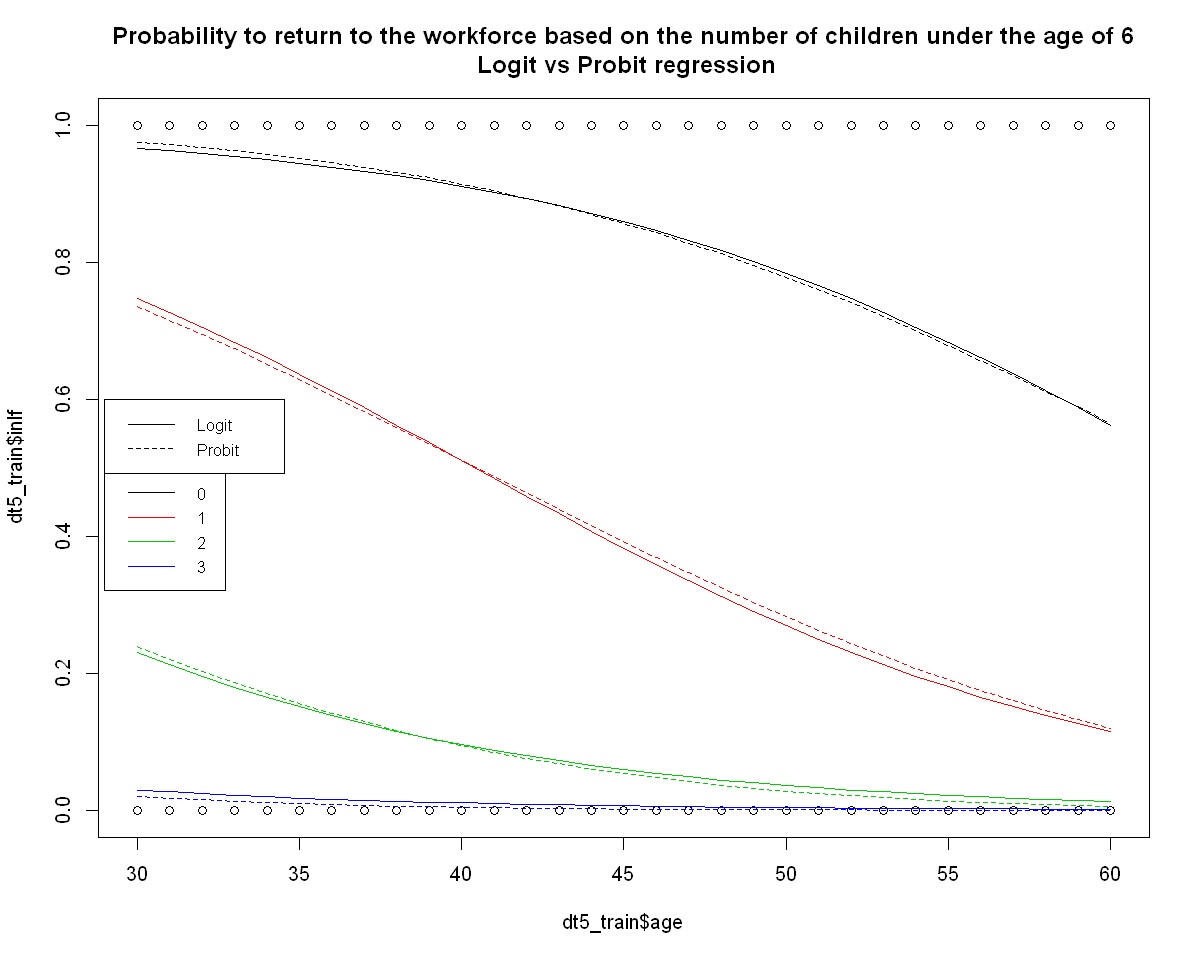

In [45]:
predict_data_temp <- predict_data_1

plot(dt5_train$age, dt5_train$inlf)
for(i in 0:max(dt5_train$kidslt6)){
    predict_data_temp$kidslt6 <- i
    lines(predict_data_temp$age, predict(logit_glm, newdata = predict_data_temp, type= "response"), col = i+1)
    lines(predict_data_temp$age, predict(probit_glm, newdata = predict_data_temp, type= "response"), col = i+1, lty = 2)
}
legend(x = 29,  y = 0.5, legend = paste0(0:max(dt5_train$kidslt6)),
      lty = rep(1, max(dt5_train$kidslt6) + 1), col = 0:max(dt5_train$kidslt6) + 1, cex = 0.8)
legend(x = 29,  y = 0.6, legend = c("Logit", "Probit"), lty = c(1, 2), col = c(1, 1), cex = 0.8)
title("Probability to return to the workforce based on the number of children under the age of 6\n Logit vs Probit regression")

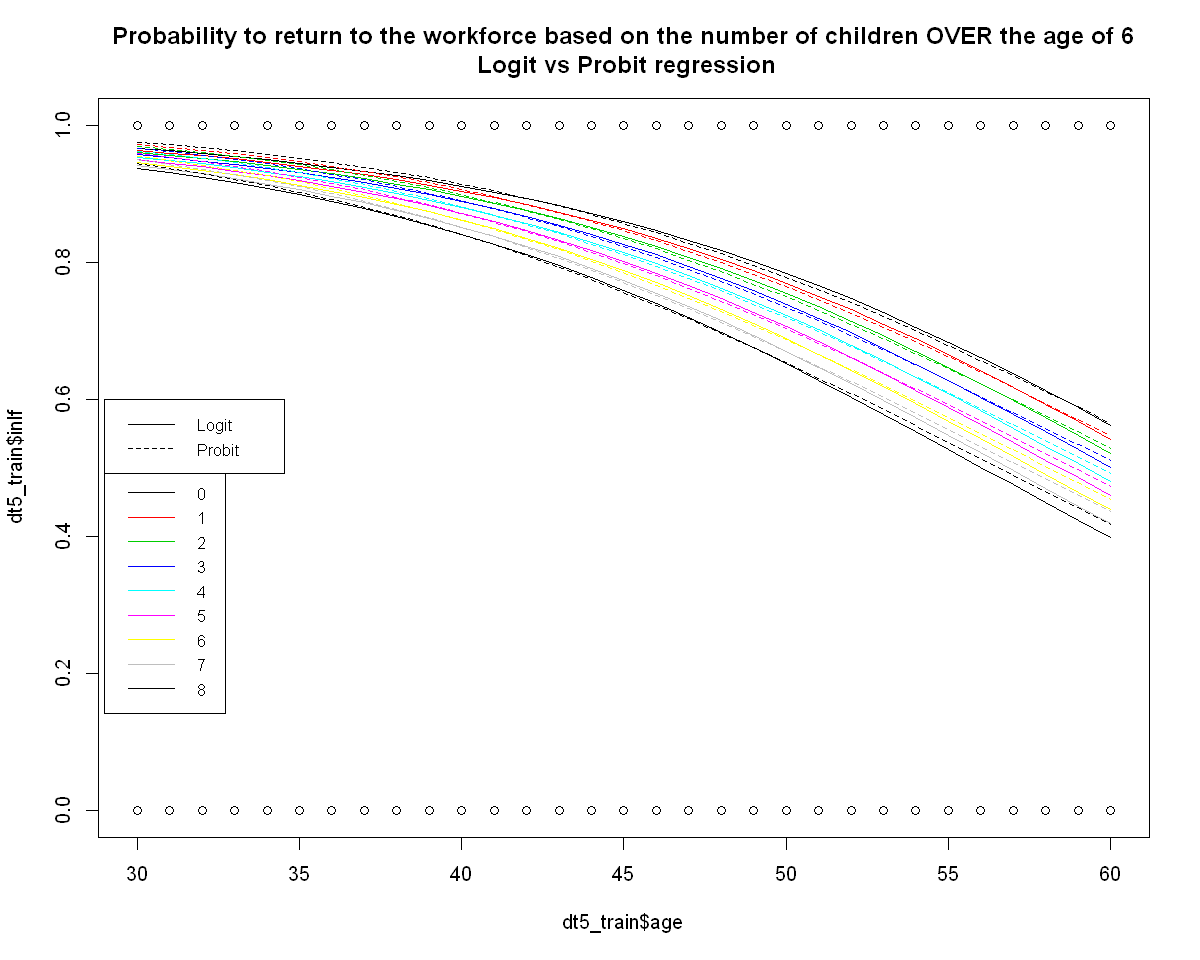

In [46]:
predict_data_temp <- predict_data_1
predict_data_temp$kidslt6 <- 0

plot(dt5_train$age, dt5_train$inlf)
for(i in 0:max(dt5_train$kidsge6)){
    predict_data_temp$kidsge6 <- i
    lines(predict_data_temp$age, predict(logit_glm, newdata = predict_data_temp, type= "response"), col = i+1)
    lines(predict_data_temp$age, predict(probit_glm, newdata = predict_data_temp, type= "response"), col = i+1, lty = 2)
}
legend(x = 29,  y = 0.5, legend = paste0(0:max(dt5_train$kidsge6)),
      lty = rep(1, max(dt5_train$kidsge6) + 1), col = 0:max(dt5_train$kidsge6) + 1, cex = 0.8)
legend(x = 29,  y = 0.6, legend = c("Logit", "Probit"), lty = c(1, 2), col = c(1, 1), cex = 0.8)
title("Probability to return to the workforce based on the number of children OVER the age of 6\n Logit vs Probit regression")

## TASK 8

### - If estimating the probability, select the cutoff prediction probability depending on the confusion matrix results:
#### - use the default 0.5 cutoff value;
#### - try to select an alternative (hopefully optimal) cutoff value;

We begin by examining the default cutoff results:

In [47]:
predicted_probs <- predict(logit_glm, dt5_train, type = "response")
print(InformationValue::confusionMatrix(dt5_train$inlf, predicted_probs, threshold = 0.5))

   0   1
0 77  42
1 97 386


We compare the results with the true values:

In [48]:
table(dt5_train$inlf)


  0   1 
174 428 

We see that we have correctly predicted that `386` women will return to the labor force. Furthermore, we have correctly predicted that `77` women will not return to the labor force.

On the other hand:

- We have incorrectly predicted that `42` women will return to the labor force (they actually did not return);
- We have incorrectly precited that `97` women will not return to the labor force (they actually did return);

In total, if we were interested in determining the amount of jobs needed for women, returning to the labor force - the difference between the number of predicted returns, and the true returns to labor force is:

In [49]:
386 + 97 - 428

[1] 55

in other words, we would have **overestimated** the overall amount of women returning to work. This would have several complications:

- too many vacant job positions may be created;
- too many school/daycare workers would be hired (as some of the women decided to remain at home to take care of their children);
- if we made any other decisions regarding compensation/wage based on the expected value of returns to labor forece - it would be overestimated;

If we were to use the optimal cutoff:

In [50]:
optimalCutoff_logit <- InformationValue::optimalCutoff(dt5_train$inlf, predict(logit_glm, dt5_train, type = "response"))[1]
print(optimalCutoff_logit)

[1] 0.4551387


The optimal cutoff is around `0.045` less than the default - this seems like a small value, but the final confusion matrix is now different:

In [51]:
print(InformationValue::confusionMatrix(dt5_train$inlf, predicted_probs, threshold = optimalCutoff_logit))

    0   1
0  71  27
1 103 401


(NOTE: the columns sum up to the true totals of `0` and `1`, as in `table(dt5_train$inlf)`)

In this case:

- the amount of correct returns to labor force predictions increased from `386` to `401` (**GOOD**);
- the amount of correct non-returns to labor force predictions decreased from `77` to `71` (**BAD**);
- the amounf of incorrect returns to labor force predictions decreased from `42` to `27` (**GOOD**);
- the amount of incorrect non-returns to labor force predictions **increased** from `97` to `103` (**BAD**);

In total, if we were interested in determining the amount of jobs needed for women, returning to the labor force - the difference between the number of predicted returns, and the true returns to labor force is:

In [52]:
401 + 103 - 428

[1] 76

We see an important result:

- Our total predicion of correct labor force returns increased;
- Our incorrect predictions resulted in **even more vacant jobs created than before**

In general it is important to determine what our objective is:

- If we are interested in the correct prediction on an **individual level**, for example, if our **correct** predictions allow us to create specific specialized job positions - then the increased correct predictions - True Positive Rate (TRP) - outweight the False Positive Rate (FPR) increase.

In [53]:
(401 / 386 - 1) * 100

[1] 3.88601

We have correctly classified $3.89\%$ more returns to labor force with the optimal cutoff. On the other hand:

In [54]:
(103 / 97 - 1) * 100

[1] 6.185567

We have incorrectly classified $6.19\%$ more false returns to labor force (i.e. we predicted 1, but it was actually 0).

If we want to look at the total correctly predicted returns to labor out of all predicted returns to labor (i.e. predited `1`'s):

In [55]:
InformationValue::precision(dt5_train$inlf, predicted_probs, threshold = 0.5)

[1] 0.7991718

In [56]:
InformationValue::precision(dt5_train$inlf, predicted_probs, threshold = optimalCutoff_logit)

[1] 0.7956349

- On the other hand, we have created more jobs than needed - if this is important to our analysis, we may need to fine-tune the cutoff further.

Comparing with the probit model:

In [57]:
predicted_probs <- predict(probit_glm, dt5_train, type = "response")
print(InformationValue::confusionMatrix(dt5_train$inlf, predicted_probs, threshold = 0.5))

   0   1
0 77  42
1 97 386


We see that default cutoff produces the same results. Meanwhile the optimal cutoff:

In [58]:
optimalCutoff_probit <- InformationValue::optimalCutoff(dt5_train$inlf, predict(probit_glm, dt5_train, type = "response"))[1]
print(optimalCutoff_probit)

[1] 0.6030785


is now $0.1\%$ **higher**, compared to the logit case. This results in the following confusion matrix table using the optimal cutoff:

In [59]:
print(InformationValue::confusionMatrix(dt5_train$inlf, predicted_probs, threshold = optimalCutoff_probit))

    0   1
0 107  63
1  67 365


The main points are now slightly different:

- The amount of correctly predicted returns to labor force decreased from `386` to `365` (**BAD**);
- The amount of correctly predicted non-returns to labor increased from `77` to `107` (**GOOD**);
- The amount of incorrectly predicted non-returns to labor increased from `42` to `63` (**BAD**);
- The amount of incorrectly predicted returns to labor decreased from `97` to `67` (**GOOD**);

So, while the models are close, the automated optimal cutoff procedures give slightly different optimal cutoff points. Now, the total amount of jobs that we would create is:

In [60]:
365 + 67 - 401

[1] 31

Much less than initially! On the other hand, we now incorrectly classify that a woman will not return to the labor force (when in fact she will return):

In [61]:
(63 /42 - 1) * 100

[1] 50

$50\%$ more than before! If it is vital that we correctly classify those women, who will return to the labor force, as returning to the labor force (maybe based on their work experience, number of children, and other factors, which are specifically different for these misclassification cases), then this is quite bad. Furthermore:

In [62]:
(365 / 368 - 1) * 100

[1] -0.8152174

while our *overall* amount of predicted labor force returns decreased, we have made more mistakes in classifying **which specific women will return to the labor force**. If the women are identical in terms of family composition, education, age and all other factors - this may not be a problem. 

In reality, unfortunately, this is not the case - we may have misclassified women, which have more experience, as not returning to the workforce, while women, with less - experience -as returning. As a result, we may opt to create more lower skill job positions, for which the actual women returning to the workforce will be overqualified, which may result in those women not taking the jobs and either being unemployed, or - even worse - leaving the workforce altogether!

On the other hand, our model precision appears to have increased:

In [63]:
InformationValue::precision(dt5_train$inlf, predicted_probs, threshold = optimalCutoff_probit)

[1] 0.8449074

So, looking at it from an economic/policymaker perspective - it is quite difficult to determine what is more important - it all depends on our task and the data that we have. consequently, we need to take care when analysing this type of data as the results of TPR, FPR, Precision, Accuracy and any other statistic may not be as usefull in every case.

## TASK 9 

### - Examine the ROC curve.

Warning message:
"Removed 3 rows containing missing values (geom_text)."

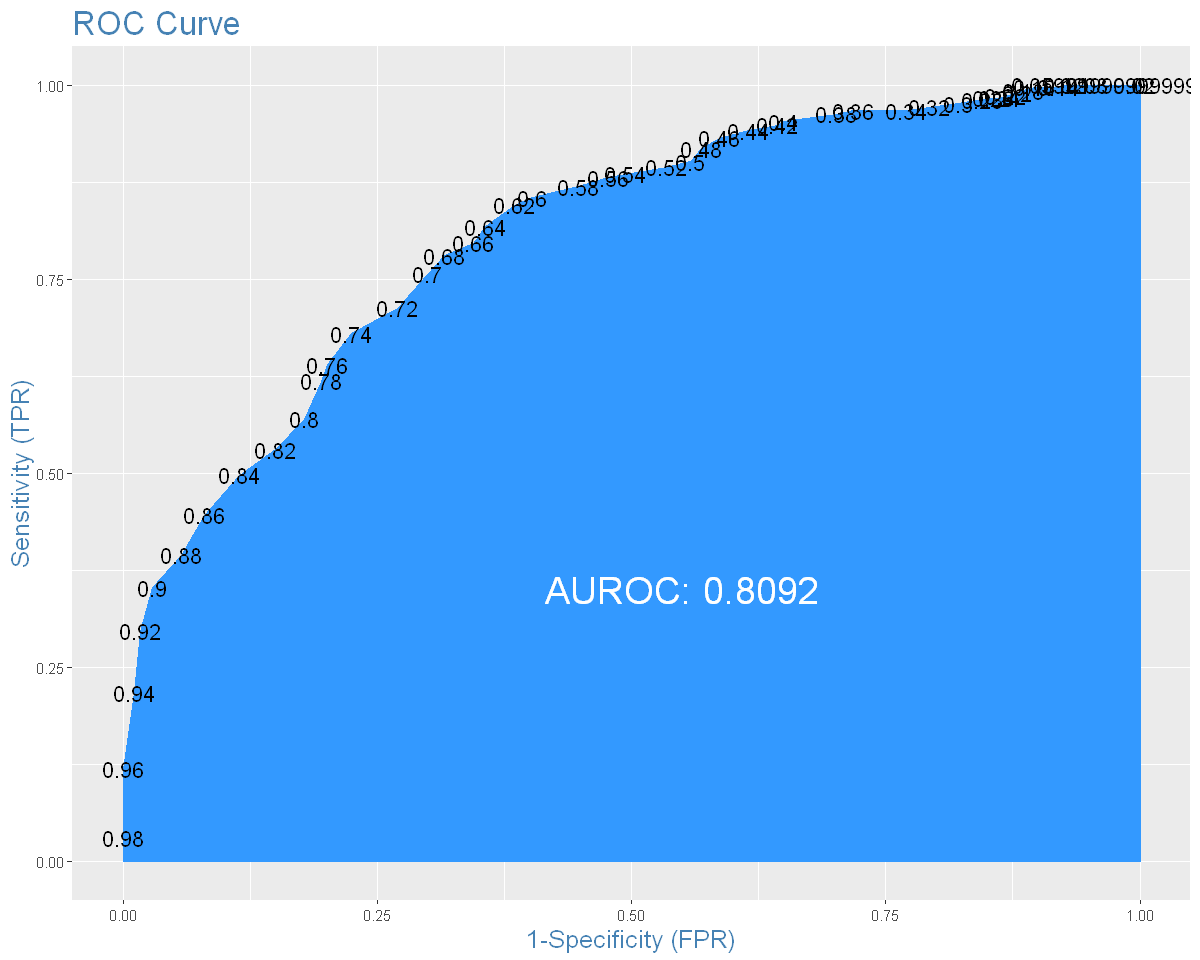

In [64]:
InformationValue::plotROC(dt5_train$inlf, predicted_probs, Show.labels = TRUE)

We may want to examine the ROC curves for different models and different cutpoints:

In [65]:
ppred <- data.frame(logit = predict(logit_glm, dt5_train, type = "response"),
              probit = predict(probit_glm, dt5_train, type = "response"))
TPR <- NULL
FPR <- NULL

for(j in 1:ncol(ppred)){
    tpr <- fpr <- NULL
    for(i in seq(from = 0.01, to = 0.99, by = 0.01)){
        tpr <- c(tpr, InformationValue::sensitivity(dt5_train$inlf, ppred[, j], threshold = i))
        fpr <- c(fpr, 1 - InformationValue::specificity(dt5_train$inlf, ppred[, j], threshold = i))
    }
    TPR <- cbind(TPR, tpr)
    FPR <- cbind(FPR, fpr) 
}

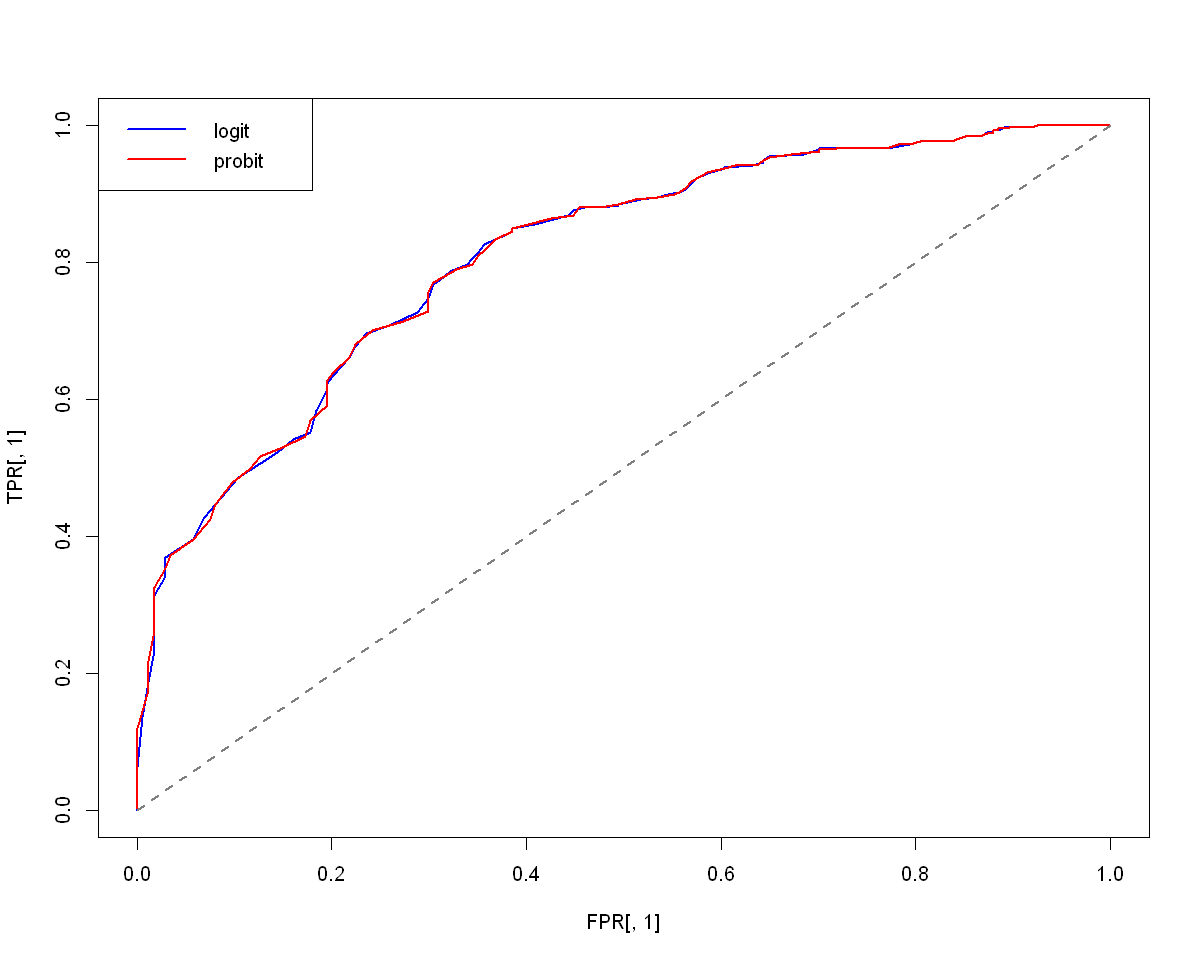

In [66]:
plot(FPR[, 1], TPR[, 1], type = "l", col = "blue", lwd = 2)
lines(FPR[, 2], TPR[, 2], type = "l", col = "red", lwd = 2)
legend("topleft", legend = c("logit", "probit"), lty = 1, col = c("blue", "red"), lwd = 2)
lines(x = c(0, 1), y = c(0, 1), col = "grey50", lty = 2, lwd = 2)

We do see that the logit and probit models do not differ much in terms of ROC.

Finally, we want to examine the AUC:

In [67]:
pred_logit  <- ROCR::prediction(predictions = ppred$logit, labels = dt5_train$inlf)
#
auc_logit <- ROCR::performance(pred_logit, measure = "auc")
auc_logit <- unlist(auc_logit@y.values)
print(auc_logit)

[1] 0.8091028


In [68]:
pred_probit  <- ROCR::prediction(predictions = ppred$probit, labels = dt5_train$inlf)
#
auc_probit <- ROCR::performance(pred_probit, measure = "auc")
auc_probit <- unlist(auc_probit@y.values)
print(auc_probit)

[1] 0.808861


Generally, an AUC of $0.7 - 0.8$ indicates an adequate model; $0.5$ indicates random guessing; $0.5-0.7$ indicates a poor model; Ideally, we would strive for the AUC value to be $> 0.8$.

The AUC for borth logit and probit models is around $0.8$, indicating that our estimated models are adequate. The AUC is slightly higher for the logit regression.

## TASK 10

### - Provide an interpretation for a few variables included in your model.

The parameters of alinear regerssion model have a straightforward interpretation:

$
\beta_j \text{ measures the effect of a unit change in } X_j \text{ on } \mathbb{E}(Y|\mathbf{X})
$

On the other hand, the parameters of nonlinear logit and probit models are not as easy to interpret, since the linear predictor affects the mean through the link function. Nevertheless, we can measure this effect via the marginal effects:

$
\dfrac{\partial \mu}{\partial X_j} = \dfrac{\partial g^{-1}(\mathbf{X} \boldsymbol{\beta})}{\partial X_j}
$

**which have the same interpretations as the coefficients in the linear model**.

For example, for the probit model:
$
p(x) = \dfrac{\partial g^{-1}(\mathbf{X} \boldsymbol{\beta})}{\partial X_j} = \dfrac{\partial \mathbf{\Phi} (\mathbf{X}_i \boldsymbol{\beta})}{\partial X_j} = \beta_j \cdot \mathbf{\phi} (\mathbf{X}_i \boldsymbol{\beta})
$

where $ \mathbf{\Phi} (\mathbf{X}_i \boldsymbol{\beta})$ is the standard normal cdf and $\mathbf{\phi} (\mathbf{X}_i \boldsymbol{\beta})$ is the standard normal pdf.

The partial effects differ by regressor values and make it difficult to present them in a compact way. Therefore, it is common to aggregate the effects in two ways:

- Partial effects at the average:
$
\text{PEA} = \dfrac{\partial g^{-1}(\overline{\mathbf{X}} \boldsymbol{\beta})}{\partial X_j}
$;
- Average partial effects:
$
\text{APE} = \dfrac{1}{N} \sum_{i = 1}^N\dfrac{\partial g^{-1}(\mathbf{X}_j \boldsymbol{\beta})}{\partial X_j}
$

We will begin by examining the coefficients themselves:

In [69]:
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      1.70098 1.04919     1.62123 0.10497 
educ             0.19791 0.05020     3.94197 0.00008 
exper            0.21693 0.03877     5.59589 0.00000 
I(exper^2)      -0.00318 0.00123    -2.57767 0.00995 
age             -0.10395 0.01832    -5.67236 0.00000 
kidslt6         -2.28803 0.37195    -6.15140 0.00000 
kidsge6         -0.08289 0.09919    -0.83566 0.40334 
kidslt6:kidsge6  0.53630 0.16900     3.17341 0.00151

In the logit model, we can interpret the coefficients in terms of the log-odds-ratio, as we did before. Some of the coefficients can be interpreted as follows:

- If `educ` increases by 1 year then the log-odds of returning to the labor force (versus not returning) increase by `0.19791`. 
- If `age` increases by 1 year, then the log-odds of returning to the labor force (versus not returning) decrease by `-0.10395`.
- If `kidslt6` increases by 1 (i.e. if we have an additional child, younger than 6 years), then the log-odds of returning to the labor force (versus not returning) changes by $−2.2880 + 0.53630 \cdot  kidsge6$, ceteris paribus.
- If `exper` increases by 1 year, then the log-odds of returning to the labor force (versus not returning) changes by $0.21693 -0.00318(2 \cdot exper + 1)$

We can also itnerpret them in terms of the odds-ratio:

In [70]:
round(exp(coef(summary(logit_glm)))[, 1, drop = FALSE], 5)

Estimate
(Intercept)     5.47929 
educ            1.21885 
exper           1.24225 
I(exper^2)      0.99682 
age             0.90127 
kidslt6         0.10147 
kidsge6         0.92046 
kidslt6:kidsge6 1.70967

- If `educ` increases by 1 year then the odds of returning to the labor force (versus not returning) increase by `1.21885`.
- If `age` increases by 1 year, then the log-odds of returning to the labor force (versus not returning) increase by a factor of `0.90127`.

and so on.

Next up, we want to evaluate the partial effects of the explanatory variables on the probability:

In [71]:
PEA_logit = mfx::logitmfx(formula = logit_glm$formula, data = logit_glm$data, atmean = TRUE)
PEA_logit$mfxest

dF/dx         Std. Err.    z          P>|z|       
educ             0.0356010216 0.0089769875  3.9658094 7.314729e-05
exper            0.0390228423 0.0069853509  5.5863825 2.318482e-08
I(exper^2)      -0.0005725429 0.0002234722 -2.5620319 1.040618e-02
age             -0.0186986384 0.0032165601 -5.8132408 6.127481e-09
kidslt6         -0.4115914788 0.0666696754 -6.1735936 6.675501e-10
kidsge6         -0.0149103840 0.0177874785 -0.8382517 4.018894e-01
kidslt6:kidsge6  0.0964745724 0.0304359033  3.1697621 1.525638e-03

`PEA` - the Partial Effects at the Average - shows that:

- a unit increase in the sample average value of `educ` results in a `0.0356` increase in the probability of returning to the labour force ;
- a unit increase in the sample average value of `age` results in a `0.018698` **decrease** in the probability of returning to the labour force ;
- if the sample average number of kids under the age of 6, `kidslt6` increases by one, then the probability of returning to the labour force changes by $-0.411591 + 0.096475 \cdot \overline{kidsge6}$;
- if the average number of `exper` increases by one, then the probability of returning to the labor force changes by $0.039023 - 0.000573 \cdot (2 \cdot \overline{exper})$

In [72]:
APE_logit = mfx::logitmfx(formula = logit_glm$formula, data = logit_glm$data, atmean = FALSE)
APE_logit$mfxest

dF/dx         Std. Err.    z          P>|z|       
educ             0.0299008551 0.0081927749  3.6496615 2.625861e-04
exper            0.0327747997 0.0068154334  4.8089091 1.517562e-06
I(exper^2)      -0.0004808716 0.0001937699 -2.4816628 1.307709e-02
age             -0.0157047537 0.0032096172 -4.8930302 9.929517e-07
kidslt6         -0.3456905620 0.0667862419 -5.1760745 2.266030e-07
kidsge6         -0.0125230460 0.0150278296 -0.8333237 4.046622e-01
kidslt6:kidsge6  0.0810277930 0.0268936290  3.0128992 2.587649e-03

`APE` - the  Average Partial Effect - shows that:

- a unit increase in `educ` results in the sample average estimated increase of `0.0299` in the probability of returning to the labour force;
- a unit increase in `age` results in the sample average estimated **decrease** of `0.015705` in the probability of returning to the labour force;
- a unit increase in `kidslt6` results  results in the sample average estimated change of $-0.01252 + 0.081028 \cdot \overline{kidsge6}$. <br>
**Note:** this is similar to the `PEA` expression, which stems from the fact that the partial derivative with respect to `kidsge6` returns $-0.01252 + 0.081028 \cdot kidsge6$. Since `APE` averages all the partial effects, `kidsge6` turns into its average $\overline{kidsge6}$. In contrast, `PEA` already uses $\overline{kidsge6}$, but the expressions become equivalent, although with different coefficients.

We can do the same with the probit regression:

In [73]:
round(coef(summary(probit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      0.95926 0.60504     1.58545 0.11286 
educ             0.11640 0.02866     4.06061 0.00005 
exper            0.12800 0.02226     5.75096 0.00000 
I(exper^2)      -0.00188 0.00071    -2.65361 0.00796 
age             -0.06025 0.01036    -5.81485 0.00000 
kidslt6         -1.34130 0.21021    -6.38088 0.00000 
kidsge6         -0.04653 0.05730    -0.81207 0.41675 
kidslt6:kidsge6  0.31497 0.09829     3.20436 0.00135

Interpretation is similar to the logit, with the difference being that instead of the `log-odds-ratio` we now have changes to the `inverse normal cdf of the probability`, $\Phi^{-1}(p_i)$. Consequently, it makes more sense to evaluate the `PEA` and `APE`:

In [74]:
PEA_probit = mfx::probitmfx(formula = probit_glm$formula, data = probit_glm$data, atmean = TRUE)
PEA_probit$mfxest

dF/dx         Std. Err.    z          P>|z|       
educ             0.0364118090 0.0089471120  4.0696718 4.707942e-05
exper            0.0400413820 0.0069878069  5.7301786 1.003249e-08
I(exper^2)      -0.0005869283 0.0002220151 -2.6436419 8.201938e-03
age             -0.0188477517 0.0032028840 -5.8846188 3.989724e-09
kidslt6         -0.4195922325 0.0658753362 -6.3694891 1.896590e-10
kidsge6         -0.0145560517 0.0178951313 -0.8134085 4.159839e-01
kidslt6:kidsge6  0.0985304764 0.0307986942  3.1991771 1.378205e-03

In [75]:
APE_probit = mfx::probitmfx(formula = probit_glm$formula, data = probit_glm$data, atmean = FALSE)
APE_probit$mfxest

dF/dx         Std. Err.    z          P>|z|       
educ             0.0301981575 0.0071744405  4.2091307 2.563551e-05
exper            0.0332083463 0.0053187829  6.2435987 4.276162e-10
I(exper^2)      -0.0004867694 0.0001802354 -2.7007420 6.918499e-03
age             -0.0156313952 0.0024919704 -6.2727051 3.548286e-10
kidslt6         -0.3479890919 0.0495031781 -7.0296313 2.070800e-12
kidsge6         -0.0120720710 0.0148541006 -0.8127097 4.163845e-01
kidslt6:kidsge6  0.0817163149 0.0249294073  3.2779085 1.045793e-03

The interpretation of `PEA` and `APE` are analogous to the logit model - a unit increase in the (average, if `PEA`) regressor results in the specified (average, if `APE`) change in the probability.

Marginal effects show the change in probability when the predictor or independent variable increases by one unit. For continuous variables this represents the instantaneous change given that the 'unit' may be very small. For binary variables, the change is from 0 to 1, so one ‘unit’ as it is usually thought.

As in the multiple linear regression case, the intercept does not have a meaningfull interpretation.

## TASK 11

#### - Write down the fitted model.

The fitted Logit model:

$
\log \left( \dfrac{\widehat{p}_i}{1 - \widehat{p}_i} \right) = \underset{(1.0492)}{1.7010} + \underset{(0.050)}{0.1979} \cdot educ + \underset{(0.0388)}{0.2169} \cdot exper - \underset{(0.0012)}{0.0032} \cdot exper^2 - \underset{(0.0183)}{0.1039} \cdot age - \underset{(0.3720)}{2.2880} \cdot kidslt6 - \underset{(0.0992)}{0.0829} \cdot kidsge6 + \underset{(0.1690)}{0.5363} \cdot (kidslt6 \times kidsge6)
$

The fitted Probit model:

$
\widehat{p}_i = \mathbf{\Phi} \left( \underset{(0.6050)}{0.9593} + \underset{(0.0287)}{0.1164} \cdot educ + \underset{(0.0223)}{0.1280} \cdot exper - \underset{(0.0007)}{0.0019} \cdot exper^2 - \underset{(0.0104)}{0.0603} \cdot age - \underset{(0.2102)}{1.3413} \cdot kidslt6 - \underset{(0.0573)}{0.0465} \cdot kidsge6 + \underset{(0.0983)}{0.3150} \cdot (kidslt6 \times kidsge6) \right)
$

## TASK 12

### - Check some arbitrary linear restrictions

In [76]:
round(coef(summary(logit_glm)), 5)

Estimate Std. Error z value  Pr(>|z|)
(Intercept)      1.70098 1.04919     1.62123 0.10497 
educ             0.19791 0.05020     3.94197 0.00008 
exper            0.21693 0.03877     5.59589 0.00000 
I(exper^2)      -0.00318 0.00123    -2.57767 0.00995 
age             -0.10395 0.01832    -5.67236 0.00000 
kidslt6         -2.28803 0.37195    -6.15140 0.00000 
kidsge6         -0.08289 0.09919    -0.83566 0.40334 
kidslt6:kidsge6  0.53630 0.16900     3.17341 0.00151

We will begin with a simple economic hypothesis:
$$
\text{ education is twice as effective, in absolute value, on the log-odds-ratio, compared to age}
$$
this is equivalent to the hypothesis that:

$
\begin{cases}
H_0&: educ + 2 \cdot age = 0\\
H_1&: educ + 2 \cdot age \neq 0
\end{cases}
$

In [77]:
car::linearHypothesis(logit_glm, c("educ + 2 * age = 0"))

Res.Df Df Chisq      Pr(>Chisq)
1 595    NA         NA        NA 
2 594     1 0.02629718 0.8711767

Since `p-value > 0.05`, we have no gounds to reject the null hypothesis and conclude that educations effect on the log-odds-ratio is twice as strong as the effect of age.

Furthermore, we may examine another hypothesis:

$
\begin{cases}
H_0&: educ + 2 \cdot age + kidslt6= 0\\
H_1&: educ + 2 \cdot age + kidslt6 \neq 0
\end{cases}
$

In [78]:
car::linearHypothesis(logit_glm, c("educ + 2 * age + kidslt6 = 0"))

Res.Df Df Chisq    Pr(>Chisq)  
1 595    NA       NA           NA
2 594     1 35.89411 2.083375e-09

Since `p-value < 0.05`, we reject the null hypothesis of this linear restricion.

Finally, we may examine a joint hypothesis of two linear restrictions:

$
\begin{cases}
H_0&: educ + 2 \cdot age = 0 \text{ and } kidslt6 = 28 \cdot kidsge6\\
H_1&: educ + 2 \cdot age \neq 0, \text{ or }  kidslt6 \neq 28 \cdot kidsge6, \text{ or both}
\end{cases}
$

In [79]:
print(car::linearHypothesis(logit_glm, c("educ + 2 * age = 0", "kidslt6 = 28 * kidsge6")))

Linear hypothesis test

Hypothesis:
educ  + 2 age = 0
kidslt6 - 28 kidsge6 = 0

Model 1: restricted model
Model 2: inlf ~ educ + exper + I(exper^2) + age + kidslt6 * kidsge6

  Res.Df Df  Chisq Pr(>Chisq)
1    596                     
2    594  2 0.0271     0.9865


Since `p-value > 0.05` we do not reject the join hypothesis of these two linear restrictions.

## TASK 13

### - Examine the model residuals

## **NOTE: This task regarding residual analysis will NOT be in the final exam and so will be added some time later for the sake of interest**

## TASK 14

### - Compare the model results between the training and test sets - is your model adequate for this data?

We will begin by evaluating the confusion matrix on the `test` data, using the optimal cutoff, which we found from the `train` dataset:

In [80]:
table(dt5_test$inlf)


  0 
151 

Note that in this data sample, our `test` set contains only zeros! This may be a nice example of how we may obtain new data - there is always a possibility that the new data, for which we do not yet know the outcome, may have only `1`'s, or only `0`'s.

Firstly, using the naive 0.5 threshold:

In [81]:
probs_logit_test <- predict(logit_glm, newdata = dt5_test, type = "response")
print(InformationValue::confusionMatrix(dt5_test$inlf, probs_logit_test, threshold = 0.5))

   0
0 59
1 92


In [82]:
probs_probit_test <- predict(probit_glm, newdata = dt5_test, type = "response")
print(InformationValue::confusionMatrix(dt5_test$inlf, probs_probit_test, threshold = 0.5))

   0
0 59
1 92


Gives the same results - around more than half of the data is incorrectly classified.

If we look at the optimal cutoff threshold:

In [83]:
print(InformationValue::confusionMatrix(dt5_test$inlf, probs_logit_test, threshold = optimalCutoff_logit))

    0
0  51
1 100


In [84]:
print(InformationValue::confusionMatrix(dt5_test$inlf, probs_probit_test, threshold = optimalCutoff_probit))

   0
0 87
1 64


In this case, the results are slightly better for the probit regression.

Unfortunately, since we do not have any `1` in our dataset - we cannot calculate the ROC and AUC.

**At this point our analysis on the test data would come to an end - since we do not have any `1` in the test data, we cannot do any further analysis.**


For interests sake, assume that out new data contains both zeros and ones (we will ignore that some (or all) of the sample observations may come from our `train` set):

In [85]:
set.seed(123)
#
dt5_test_v2 <- dt5[sample(1:nrow(dt5), nrow(dt5) - n, replace = FALSE), ]
table(dt5_test_v2$inlf)


 0  1 
61 90 

In [86]:
probs_logit_test <- predict(logit_glm, newdata = dt5_test_v2, type = "response")
print(InformationValue::confusionMatrix(dt5_test_v2$inlf, probs_logit_test, threshold = optimalCutoff_logit))

   0  1
0 28  3
1 33 87


In [87]:
probs_probit_test <- predict(probit_glm, newdata = dt5_test_v2, type = "response")
print(InformationValue::confusionMatrix(dt5_test_v2$inlf, probs_probit_test, threshold = optimalCutoff_probit))

   0  1
0 38 14
1 23 76


We see that for this test set, we correctly predict the majority of `1`'s. Again part of this is because all of the observations with `1` were included in our model. In this case, the logit model appears to be better at classifying `1` correctly, compared to the probit model.

In [88]:
options(repr.plot.width = 6)
options(repr.plot.height = 4)

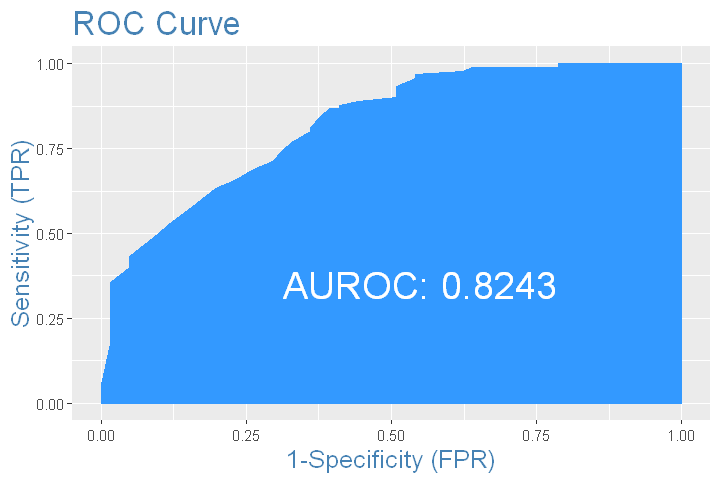

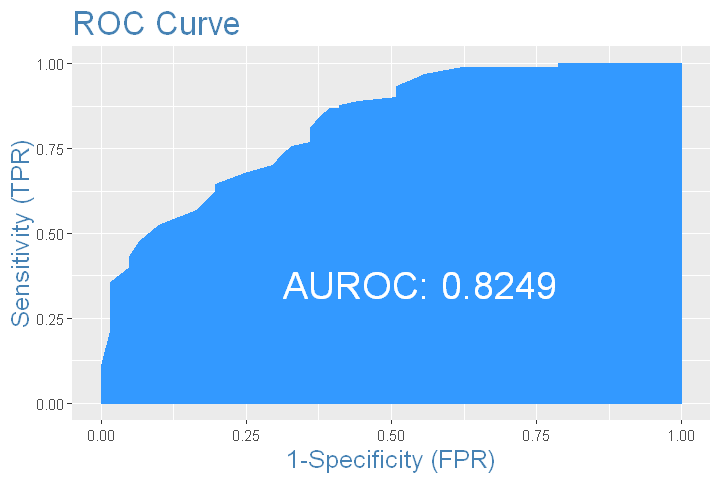

In [89]:
InformationValue::plotROC(dt5_test_v2$inlf, probs_logit_test, Show.labels = FALSE)
InformationValue::plotROC(dt5_test_v2$inlf, probs_probit_test, Show.labels = FALSE)

The AUC is around $0.8$, indicating an adequate model.